In [2]:
import pandas as pd
import numpy as np

In [47]:
#read GB
gb=pd.read_csv('google_2020_GB_Region_Mobility_Report.csv')



In [48]:
gb.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
1,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
2,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
3,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
4,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0


In [ ]:
gb['sub_region_2'].unique()

In [14]:
gb['census_fips_code'].unique()

array([nan])

In [49]:
gb['date']=pd.to_datetime(gb['date'])

In [50]:
len(gb[gb['sub_region_1'].isna() == True])

340

In [51]:
gb['dow']=gb['date'].dt.dayofweek
#note: monday = 0 and Sunday =6

In [52]:
import holidays 
uk_holidays = holidays.UnitedKingdom()

In [53]:
#Remove holidays
gb['is_holiday'] = [1 if str(val).split()[0] in uk_holidays else 0 for val in gb['date']]
gb=gb[gb['is_holiday'] == 0]

In [63]:
#Get uk numbers

condition= [(gb['sub_region_1'].isnull()) & (gb['sub_region_2'].isnull())]
value=['UK']
gb['is_UK']=np.select(condition, value)

In [65]:
gb.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,dow,is_holiday,is_UK
141321,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2021-01-15,-73.0,-31.0,-56.0,-74.0,-59.0,24.0,4,0,0
141322,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2021-01-16,-77.0,-34.0,-63.0,-78.0,-46.0,17.0,5,0,0
141323,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2021-01-17,-76.0,-34.0,-40.0,-77.0,-41.0,13.0,6,0,0
141324,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2021-01-18,-65.0,-30.0,-37.0,-70.0,-58.0,21.0,0,0,0
141325,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2021-01-19,-69.0,-34.0,-53.0,-74.0,-59.0,23.0,1,0,0


In [59]:
gb['sub_region_1'].iloc[0]

nan

In [66]:

gb_hackney=gb[gb['sub_region_2'] == 'London Borough of Hackney']

In [67]:
gb_hackney.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,dow
42496,GB,United Kingdom,Greater London,London Borough of Hackney,NaN,GB-HCK,NaN,2020-02-15,-10.0,-8.0,-33.0,-10.0,0.0,3.0,5
42497,GB,United Kingdom,Greater London,London Borough of Hackney,NaN,GB-HCK,NaN,2020-02-16,-11.0,-13.0,-45.0,-3.0,-2.0,2.0,6
42498,GB,United Kingdom,Greater London,London Borough of Hackney,NaN,GB-HCK,NaN,2020-02-17,8.0,3.0,11.0,-4.0,-7.0,2.0,0
42499,GB,United Kingdom,Greater London,London Borough of Hackney,NaN,GB-HCK,NaN,2020-02-18,0.0,-3.0,-8.0,-8.0,-7.0,2.0,1
42500,GB,United Kingdom,Greater London,London Borough of Hackney,NaN,GB-HCK,NaN,2020-02-19,2.0,-2.0,-9.0,-6.0,-7.0,2.0,2


In [26]:
import plotly
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

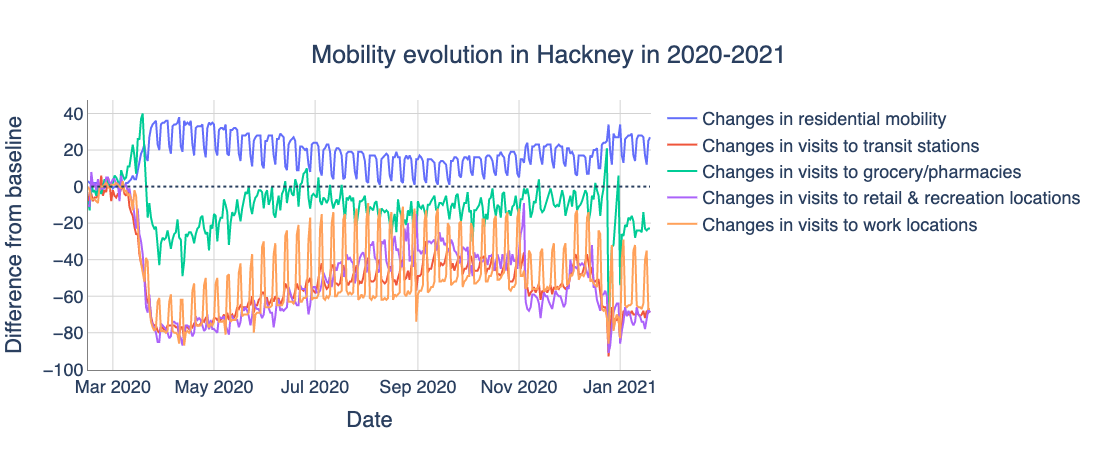

In [112]:
trace0=go.Scatter(
x=gb_hackney['date'],
y=gb_hackney['residential_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in residential mobility'
)
trace1=go.Scatter(
x=gb_hackney['date'],
y=gb_hackney['transit_stations_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to transit stations'
)
trace2=go.Scatter(
x=gb_hackney['date'],
y=gb_hackney['grocery_and_pharmacy_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to grocery/pharmacies'
)
trace3=go.Scatter(
x=gb_hackney['date'],
y=gb_hackney['retail_and_recreation_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to retail & recreation locations'
)
trace4=go.Scatter(
x=gb_hackney['date'],
y=gb_hackney['workplaces_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to work locations'
)

data=[trace0, trace1, trace2, trace3, trace4]
layout=go.Layout(title={'text': 'Mobility evolution in Hackney in 2020-2021','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Difference from baseline',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_layout(shapes=[
dict(
  type= 'line',
  yref= 'y', y0=0, y1= 0,   # adding a horizontal line at Y = 1
  xref= 'x', x0= min(gb_hackney_week['date']), x1= max(gb_hackney_week['date']), line =dict(dash="dot")
     )]) 
iplot(fig)

### to do:
- remove public holidays (use the holiday package)
- look at work and transit stations on weekdays or weekends separately (name weekdays in separate column)

In [70]:
gb_hackney_week=gb_hackney[gb_hackney['dow'].isin(list(range(5)))]

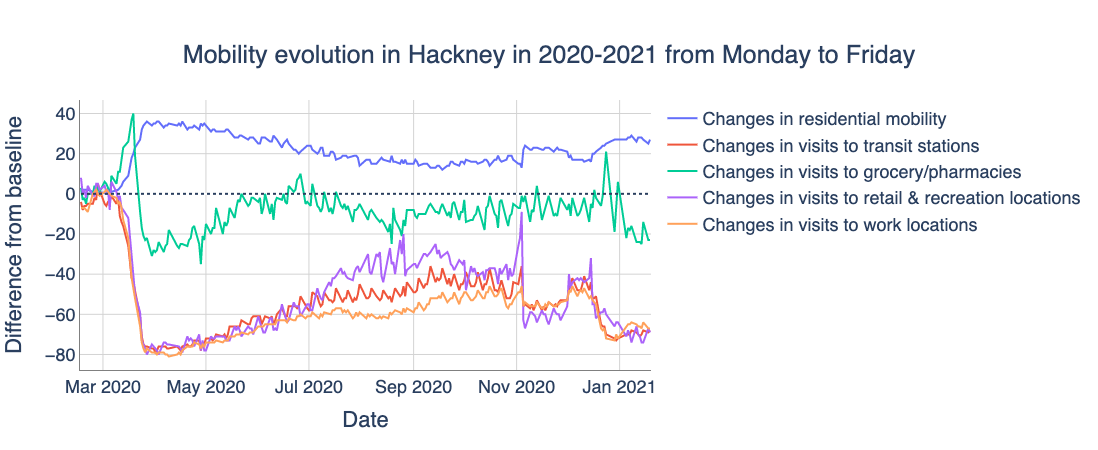

In [110]:
trace0=go.Scatter(
x=gb_hackney_week['date'],
y=gb_hackney_week['residential_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in residential mobility'
)
trace1=go.Scatter(
x=gb_hackney_week['date'],
y=gb_hackney_week['transit_stations_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to transit stations'
)
trace2=go.Scatter(
x=gb_hackney_week['date'],
y=gb_hackney_week['grocery_and_pharmacy_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to grocery/pharmacies'
)
trace3=go.Scatter(
x=gb_hackney_week['date'],
y=gb_hackney_week['retail_and_recreation_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to retail & recreation locations'
)
trace4=go.Scatter(
x=gb_hackney_week['date'],
y=gb_hackney_week['workplaces_percent_change_from_baseline'],
mode ='lines',
name = 'Changes in visits to work locations'
)

data=[trace0, trace1, trace2, trace3, trace4]
layout=go.Layout(title={'text': 'Mobility evolution in Hackney in 2020-2021 from Monday to Friday','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Difference from baseline',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_layout(shapes=[
dict(
  type= 'line',
  yref= 'y', y0=0, y1= 0,   # adding a horizontal line at Y = 1
  xref= 'x', x0= min(gb_hackney_week['date']), x1= max(gb_hackney_week['date']), line =dict(dash="dot")
     ) 
])
iplot(fig)

In [21]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow=list(range(5))
l=[days[n] for n in dow]


In [22]:
l

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [67]:
#make functions for plot
#1 - per LAD or google LAD, dow is a list!, select_reg is either LAD or bigLAD, :
def get_plot_LAD(lad, select_reg='LAD',dow=list(range(5))):
    days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if select_reg == 'LAD':
        df=gb[gb['sub_region_2'] == lad]
    if select_reg == 'bigLAD':
        df=gb[gb['sub_region_1'] == lad]
    if select_reg == 'UK':
        df=gb[gb['is_UK'] == lad]
    df=df[df['dow'].isin(dow)]
    trace0=go.Scatter(
    x=df['date'],
    y=df['residential_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in residential mobility'
    )
    trace1=go.Scatter(
    x=df['date'],
    y=df['transit_stations_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to transit stations'
    )
    trace2=go.Scatter(
    x=df['date'],
    y=df['grocery_and_pharmacy_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to grocery/pharmacies'
    )
    trace3=go.Scatter(
    x=df['date'],
    y=df['retail_and_recreation_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to retail & recreation locations'
    )
    trace4=go.Scatter(
    x=df['date'],
    y=df['workplaces_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to work locations'
    )

    data=[trace0, trace1, trace2, trace3, trace4]
    layout=go.Layout(title={'text': f'Mobility evolution in {lad} on {[days[n] for n in dow]} 2020-2021 ','y':0.9,'x':0.5,'xanchor': 'center',
            'yanchor': 'top'},
                     xaxis_title='Date',
                    yaxis_title='Difference from baseline',
                    font=dict(
            family="Helvetica",
            size=18,
            #color="blue"
                    ),
            plot_bgcolor='rgb(255,255,255)',
                     )
    fig=go.Figure(data=data, layout=layout)
    fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'y', y0=0, y1= 0,   # adding a horizontal line at Y = 1
      xref= 'x', x0= min(df['date']), x1= max(df['date']), line =dict(dash="dot")
         ) 
    ])
    iplot(fig)
    
        
    


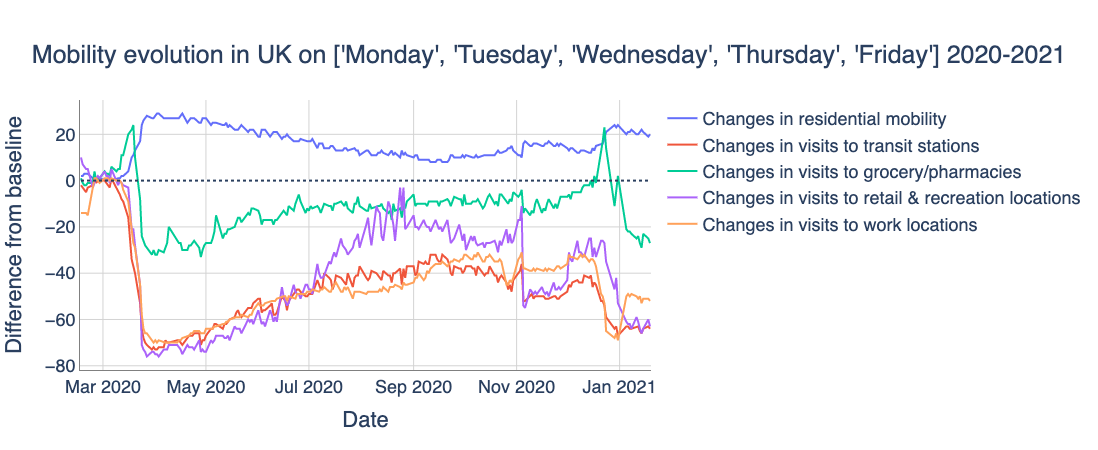

In [68]:
get_plot_LAD('UK', select_reg='UK' )

## make function more useful for the dashoard:

In [80]:
# make a list of all possible places:
places=list(gb['sub_region_1'].unique())+list(gb['sub_region_2'].unique())+list(gb['is_UK'].unique())
places.remove('0')
places.remove(np.nan)#nan from the sub_region1
places.remove(np.nan)#nan from the sub_region2


In [94]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [98]:
def get_plot(place, day):
    days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if place in list(gb['sub_region_2'].unique()):
        df=gb[gb['sub_region_2'] == place]
    if place in list(gb['sub_region_1'].unique()):
        df=gb[gb['sub_region_1'] == place]
    if place == 'UK':
        df=gb[gb['is_UK'] == place]
        
    df=df[df['dow'] == days.index(day)]

    trace0=go.Scatter(
    x=df['date'],
    y=df['residential_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in residential mobility'
    )
    trace1=go.Scatter(
    x=df['date'],
    y=df['transit_stations_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to transit stations'
    )
    trace2=go.Scatter(
    x=df['date'],
    y=df['grocery_and_pharmacy_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to grocery/pharmacies'
    )
    trace3=go.Scatter(
    x=df['date'],
    y=df['retail_and_recreation_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to retail & recreation locations'
    )
    trace4=go.Scatter(
    x=df['date'],
    y=df['workplaces_percent_change_from_baseline'],
    mode ='lines',
    name = 'Changes in visits to work locations'
    )

    data=[trace0, trace1, trace2, trace3, trace4]
    layout=go.Layout(title={'text': f'Mobility evolution in {place} on {day}s 2020-2021 ','y':0.9,'x':0.5,'xanchor': 'center',
            'yanchor': 'top'},
                     xaxis_title='Date',
                    yaxis_title='Difference from baseline',
                    font=dict(
            family="Helvetica",
            size=18,
            #color="blue"
                    ),
            plot_bgcolor='rgb(255,255,255)',
                     )
    fig=go.Figure(data=data, layout=layout)
    fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'y', y0=0, y1= 0,   # adding a horizontal line at Y = 1
      xref= 'x', x0= min(df['date']), x1= max(df['date']), line =dict(dash="dot")
         ) 
    ])
    iplot(fig)
    
        
    


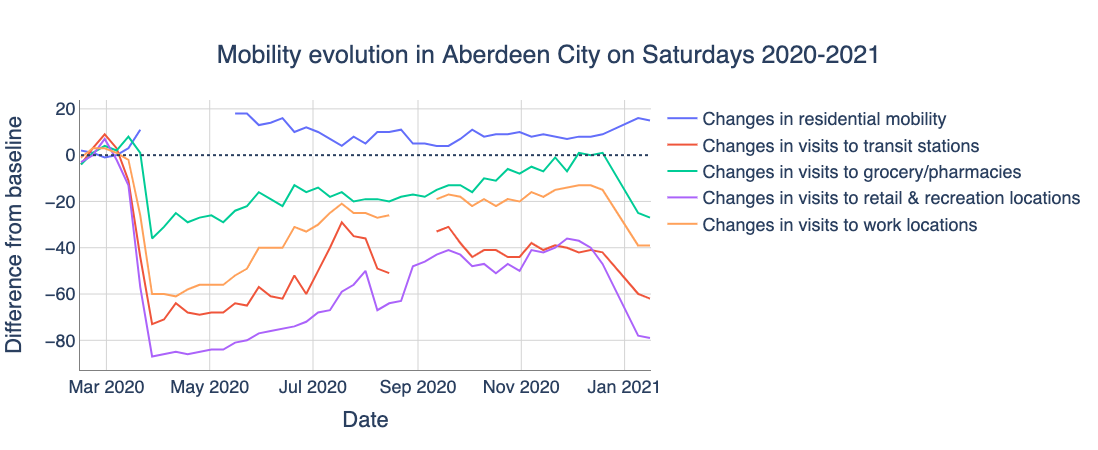

In [107]:
get_plot(places[0], days[5])